In [10]:
from trajectree.fock_optics.utils import *
from trajectree.fock_optics.light_sources import *
from trajectree.fock_optics.devices import *
from trajectree.fock_optics.measurement import *
from trajectree.fock_optics.outputs import *

import time
import json
import numpy as np

In [22]:
# params
trunc = 1
N = trunc+1
error_tolerance = 1e-12

mean_photon_num = (0.26)
efficiency = 0.9


num_modes = 8
# Create vacuum state
vacuum = create_vacuum_state(num_modes=num_modes, N=N)

# Entangled state from EPS
psi, TMSV_state = light_source(vacuum, N, mean_photon_num, num_modes, error_tolerance, compress=True, contract=True)
# trying new ls here:
# psi = new_ls(N, mean_photon_num, error_tolerance) 

read_quantum_state(psi, N, num_states = 2)

idler_angles = np.linspace(0, np.pi, 15)
signal_angles = np.linspace(0, 2*np.pi, 40)

Corresponding Basis terms:
0H0V_B 0H0V_A - 0 - [0.93390959+0.j]
0H1V_B 0H1V_A - 5 - [0.+0.24844007j]
1H0V_B 1H0V_A - 10 - [0.+0.24844007j]
1H1V_B 1H1V_A - 15 - [-0.06609041+0.j]


Corresponding Basis terms:
0H0V_D 0H0V_C 0H0V_B 0H0V_A - 0 - [0.93536243+0.j]
0H0V_D 0H0V_C 0H1V_B 0H1V_A - 10 - [0.+0.23752884j]
0H0V_D 0H0V_C 0H2V_B 0H2V_A - 20 - [-0.06355788-0.j]
0H0V_D 0H0V_C 1H0V_B 1H0V_A - 30 - [-0.+0.23752884j]
0H0V_D 0H0V_C 1H1V_B 1H1V_A - 40 - [-0.06031881-0.j]
0H0V_D 0H0V_C 1H2V_B 1H2V_A - 50 - [0.-0.01614008j]
0H0V_D 0H0V_C 2H0V_B 2H0V_A - 60 - [-0.06355788-0.j]
0H0V_D 0H0V_C 2H1V_B 2H1V_A - 70 - [-0.-0.01614008j]
0H0V_D 0H0V_C 2H2V_B 2H2V_A - 80 - [0.00431876+0.j]
4.2919652462005615


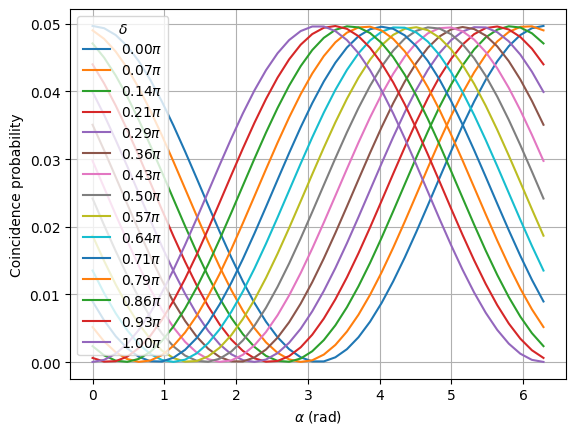

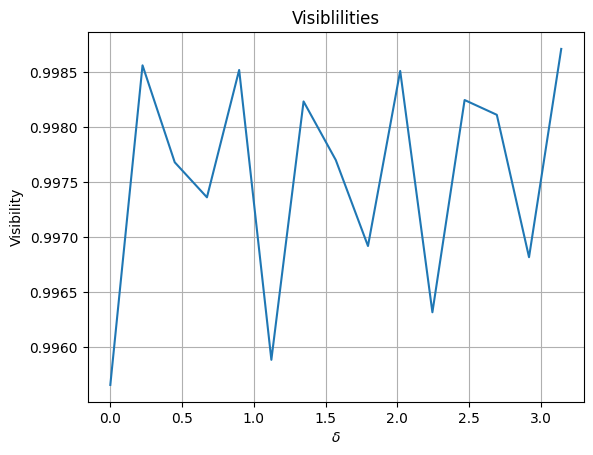

In [16]:
start = time.time()

read_quantum_state(psi, N)

coincidence_PNR = rotate_and_measure(psi, N, psi.site_tags, num_modes, efficiency, error_tolerance, idler_angles, signal_angles, rotations = {"signal":(0,1), "idler":(2,3)}, measurements = {1:(0,2), 0:(1,3)}, pnr = False, det_outcome = 1, compress=True, contract=True, draw = False)

fringes = {theta:data for theta, data in zip(idler_angles, coincidence_PNR)}
plot_coincidences(list(fringes.values()), list(fringes.keys()), signal_angles)

print(time.time()-start)